> **Diagnosing Diabetic Retinopathy from Fundus Photos **

About Diabetic Retinopathy

Diabetic Retinopathy is a diabetic eye disease that can lead to vision loss and blindness in extreme cases. It occurs when high blood sugar damages blood vessels in the retina (back of the eye). Diabetic retinopathy is typically diagnosed by ophthalmologists via fundus photography. They take a picture of your retina and look for the telltale signs as shown below:

![](https://www.researchgate.net/profile/Asiri_Wijesinghe/publication/303481072/figure/fig1/AS:394097530556416@1470971581841/Retinal-lesions-in-DR-such-as-microaneurysms-exudates-and-hemorrhages-regions-13.png)

Microaneyrsm - a tiny swelling in the side of a blood vessel characterized by small red dots on the retina

Hemmorages - bleeding from a ruptured blood vessel

Soft exudates (cotton-wool spots) - internal superficial leakage from retinal arteries

Hard exudates - extracellular lipid leaked from retinal capillaries characterized by yellow grains




From a Kaggle competition, I was able to access ~3,600 retina images. 

Each image in the training dataset was labeled with one of the following diagnoses: 

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

My goal for this project was to diagnosis whether a patient has diabetic retinopathy (DR) (and to what degree) from running these fundus photos through my machine learning algorithm.

First, I imported the photos from the Kaggle competition:

In [3]:
%%time 
# import libraries that we need 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
import cv2
from tqdm import tqdm 
from PIL import Image, ImageEnhance
import os

# import the data from a kaggle competition
for dirname, _, filenames in os.walk('/kaggle/input/aptos2019-blindness-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.


/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/train_images/356304d15a5c.png
/kaggle/input/aptos2019-blindness-detection/train_images/b1c6f0997e27.png
/kaggle/input/aptos2019-blindness-detection/train_images/55f7f018c61c.png
/kaggle/input/aptos2019-blindness-detection/train_images/58184d6fd087.png
/kaggle/input/aptos2019-blindness-detection/train_images/66d2ca47aa44.png
/kaggle/input/aptos2019-blindness-detection/train_images/e5de79795c1d.png
/kaggle/input/aptos2019-blindness-detection/train_images/c1c8550508e0.png
/kaggle/input/aptos2019-blindness-detection/train_images/22a6da005395.png
/kaggle/input/aptos2019-blindness-detection/train_images/1c47815f4a6b.png
/kaggle/input/aptos2019-blindness-detection/train_images/5de4615a5161.png
/kaggle/input/aptos2019-blindness-detection/train_images/c6229222bf22.png
/kaggle/input

/kaggle/input/aptos2019-blindness-detection/train_images/ee36ca728641.png
/kaggle/input/aptos2019-blindness-detection/train_images/07a0e34c8d20.png
/kaggle/input/aptos2019-blindness-detection/train_images/8ceff4c4c860.png
/kaggle/input/aptos2019-blindness-detection/train_images/2cfe8703f265.png
/kaggle/input/aptos2019-blindness-detection/train_images/8b568d47a1fd.png
/kaggle/input/aptos2019-blindness-detection/train_images/803120c5d287.png
/kaggle/input/aptos2019-blindness-detection/train_images/f4874247ede6.png
/kaggle/input/aptos2019-blindness-detection/train_images/6a2c3f4ef329.png
/kaggle/input/aptos2019-blindness-detection/train_images/8201cab8322d.png
/kaggle/input/aptos2019-blindness-detection/train_images/7bc4dd99eee5.png
/kaggle/input/aptos2019-blindness-detection/train_images/ae61e19fb766.png
/kaggle/input/aptos2019-blindness-detection/train_images/ff77e8e5b5f3.png
/kaggle/input/aptos2019-blindness-detection/train_images/49a4765f8822.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/test_images/0952ca2ece1c.png
/kaggle/input/aptos2019-blindness-detection/test_images/a6533f3144ba.png
/kaggle/input/aptos2019-blindness-detection/test_images/212fc55744e9.png
/kaggle/input/aptos2019-blindness-detection/test_images/baf2f593243e.png
/kaggle/input/aptos2019-blindness-detection/test_images/aa60bff84a4c.png
/kaggle/input/aptos2019-blindness-detection/test_images/41cc795c4acd.png
/kaggle/input/aptos2019-blindness-detection/test_images/764e6ea355ac.png
/kaggle/input/aptos2019-blindness-detection/test_images/6ad7b5beef75.png
/kaggle/input/aptos2019-blindness-detection/test_images/308924f570d7.png
/kaggle/input/aptos2019-blindness-detection/test_images/b6017bf3847d.png
/kaggle/input/aptos2019-blindness-detection/test_images/1a0a62061725.png
/kaggle/input/aptos2019-blindness-detection/test_images/e976cf76fe42.png
/kaggle/input/aptos2019-blindness-detection/test_images/a4105f653783.png
/kaggle/input/aptos2019-blindness-detection/test_im

In [4]:
# read the imported csv files 

N=3662 # number of images 

df_test = pd.read_csv("../input/aptos2019-blindness-detection/test.csv")
df_train = pd.read_csv("../input/aptos2019-blindness-detection/train.csv")

Let's take a look at a portion of the training data csv:

In [5]:
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


As shown above, the csv gives the image's id_code in the first column and the corresponding diagnosis for severity of diabetic retinopathy in the second column.

Now let's take a look at the distribution of diabetic retinopathy diagnosis by plotting a histogram of the counts and printing the raw counts:

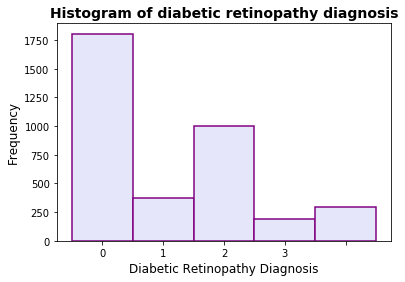

In [6]:
(counts,bin_edges,_)=plt.hist(df_train['diagnosis'],align='left',bins=5,edgecolor='purple',linewidth=1.5,color='lavender')
plt.title('Histogram of diabetic retinopathy diagnosis', fontsize=14,weight='bold')
plt.xticks(bin_edges[:-1], np.arange(0,5,1))

ax=plt.gca()
ax.set_xlabel('Diabetic Retinopathy Diagnosis',fontsize=12);
ax.set_ylabel('Frequency',fontsize=12);

df_train['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

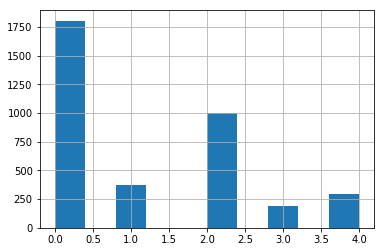

In [7]:
df_train['diagnosis'].hist()


Let's take a look at the actual retina images we got from the Kaggle competition:

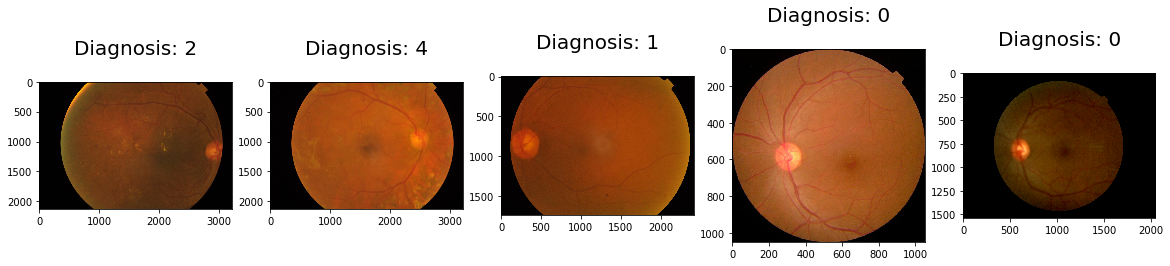

In [8]:
paths='../input/aptos2019-blindness-detection/train_images/'+df_train['id_code'][:5]+'.png'
plt.figure(figsize=(20,4))
for index, (path,label) in enumerate(zip(paths,df_train['diagnosis'][:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(Image.open(path))
    plt.title('Diagnosis: %i\n' % label, fontsize = 20)

> **Image Preprocssing **

Before running the images through my machine learning algorithm, I wanted to standardize all the images and improve lighting conditions to make the telltale signs of diabetic retinopathy that we discussed earlier more obvious. 

Since these images come from a variety of clinics and imaging conditions, the sizes of the image are different and so I created a function called preprocess_image to resize the images to 224x224 and increase the image contrast by 1.5x. I chose to increase the contrast to make the telltale signs of diabetic retinopathy more obvious. 

In [9]:
def preprocess_image(path, desired_size=224):
    '''
    resize image to desired size x desired size
    and also increase contrast by 1.5x
    '''
    im = Image.open(path)
    im = im.resize((desired_size, )*2,resample=Image.LANCZOS)
    
    # increase contrast of the images
    enhancer = ImageEnhance.Brightness(im)
    factor = 1.5 #factor > 1 increases the contrast
    im_output = enhancer.enhance(factor)
    return im_output

After creating the function in charge of preprocessing the images, I ran all 3,662 images through my preprocessing function and stored the image data in a 4D array called pics_data. 

In [10]:
%%time 

# reading in images into the array pics_data
# https://www.kaggle.com/xhlulu/aptos-2019-densenet-keras-starter

# create an empty 4d array to store the images
pics_data = np.empty((N, 224, 224,3), dtype=np.uint8)

for i, image_name in enumerate(tqdm(df_train['id_code'][:N])):
    pics_data[i, :, :,:] = preprocess_image(f'../input/aptos2019-blindness-detection/train_images/{image_name}.png')


100%|██████████| 3662/3662 [09:29<00:00,  6.43it/s]

CPU times: user 8min 59s, sys: 5.24 s, total: 9min 4s
Wall time: 9min 29s


After processing my images, here's a glimpse of the images after preprocessing. Notice how the contrast is increased and the images are all the same size now. 

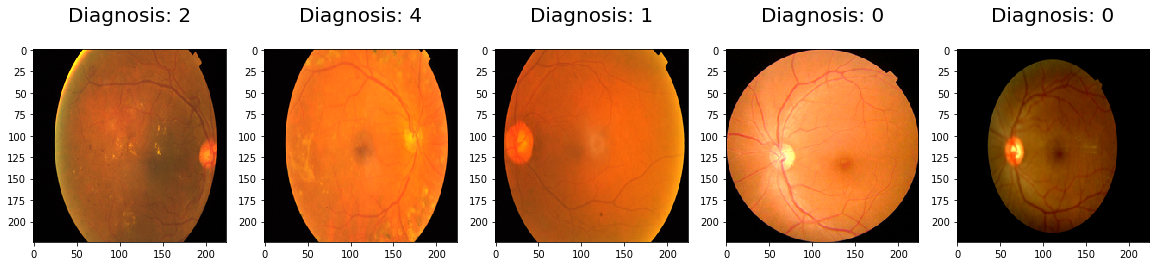

In [11]:
plt.figure(figsize=(20,4))
for index, (path,label) in enumerate(zip(paths,df_train['diagnosis'][:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(preprocess_image(path))
    plt.title('Diagnosis: %i\n' % label, fontsize = 20)

Here I'm just reformatting the shape of my arrays to make sure I can run it through the next steps.

In [12]:
# store corresponding diagnoses in an array named y_data

y_data=np.array(df_train['diagnosis'][:N])

In [13]:
# print the shape of y_data array
y_data.shape

(3662,)

In [14]:
# print the shape of pics_data
pics_data.shape

(3662, 224, 224, 3)

In [15]:
# reshape y_data from 1D --> 2D 
y_data2D=y_data.reshape(N,1)

In [16]:
# reshape pics_data from 1D --> 2D 
pics_data2D=pics_data.reshape(N,150528)

In the next part, I split up the training images into a training set of images and a testing set of images. I also split up the corresponding diagnoses into a training set and testing set. We will use the training sets to train the model and use the testing sets to test the model and see how the model performs on data it hasn't seen before after training. 

In [17]:
# split dataset into training and test sets in a way that is blind to the programmer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pics_data2D, y_data2D, test_size=0.25, random_state=0)

Finally, it is time to make the model! Below, I created a logistic regressor and trained it using my training datasets.

In [20]:
%%time

from sklearn.linear_model import LogisticRegression
# create logistic regressor
logisticRegr = LogisticRegression(random_state=0)
# train logistic regressor using training sets
logisticRegr.fit(x_train, y_train.ravel()) 

CPU times: user 6min 21s, sys: 11.1 s, total: 6min 32s
Wall time: 3min 33s


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now the logistic regressor has been trained! 
Time to use the newly-trained model to make diagnoses predictions on our testing set of images.

In [21]:

predictions = logisticRegr.predict(x_test) # predict entire test set
y_test_reshaped=y_test.reshape(916,)
df = pd.DataFrame({'Actual':y_test_reshaped,'Predicted':predictions})
df.tail()

,Actual,Predicted
911,0,0
912,0,0
913,0,0
914,0,0
915,2,2


Let's take a look at how accurate our model was. Below I printed some stats that will help us evaluate the error of this model.

In [22]:
# evaluating the algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[430   4  13   1   0]
 [  9  48  35   2   2]
 [ 30  42 160   5  13]
 [  2  10  22   4   1]
 [  6  14  44   6  13]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       448
           1       0.41      0.50      0.45        96
           2       0.58      0.64      0.61       250
           3       0.22      0.10      0.14        39
           4       0.45      0.16      0.23        83

    accuracy                           0.72       916
   macro avg       0.51      0.47      0.47       916
weighted avg       0.69      0.72      0.70       916



Accuracy of the logistic regression model above is ~72% as shown in the number in the f1-score column and accuracy row.

*How exactly is the model being trained?*

In logistic regression (a form of supervised learning), when we are training the dataset, the program takes a whole bunch of x vectors from x_train set and runs them through the model $\theta$. Then the program compares the calculated hypothesis (predicted) values h(x) and compares them to the actual y values stored in y_train. Mathematically, the computer calculates the cost function which is the sum of all the squared differences between actual - predicted y. 

Then the algorithm uses gradient descent and partial derivative calculus stuff behind the scenes to change the numbers in the model vector $\theta$ until the cost function (error) is minimized! 


In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=0,max_iter=1000)
logisticRegr.fit(x_train, y_train.ravel()) # train regressor 
# evaluating the algorithm
predictions = logisticRegr.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=0,solver='saga')
logisticRegr.fit(x_train, y_train.ravel()) # train regressor 
# evaluating the algorithm
predictions = logisticRegr.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

** Neural Net **

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=20,random_state=0) # creates neural network
# hidden_layer_sizes creates 3 layers of 10 nodes each; just try different combos and see what is best
#max_iter = number of iterations of epochs (cycles of feed-forward and back propagation)
mlp.fit(x_train, y_train.ravel())
# make predictions to our test data
predictions=mlp.predict(x_test)
# evaluating the neural net algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),random_state=0) # creates neural network
# hidden_layer_sizes creates 3 layers of 10 nodes each; just try different combos and see what is best
#max_iter = number of iterations of epochs (cycles of feed-forward and back propagation)
mlp.fit(x_train, y_train.ravel())
# make predictions to our test data
predictions=mlp.predict(x_test)
# evaluating the neural net algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Using solver='adam' (the default) since it is better with larger datasets. While others may give better results, this don't perform as well with large datasets like I have here.